# Introduction

Zomato is one of the key players in providing customers with a wide range of dining options. The restaurant industry in Bangalore, India, has experienced significant growth. To shed light on Bangalore's restaurant scene, this analysis attempts to investigate some of the most important aspects of Zomato restaurant data. The goal of this project is to analyze the restaurants in Banglore, India. When looking for food and restaurants in a particular area to order from and read reviews about, Zomato is one of the most popular apps. Zomato has not only made it possible to order food while relaxing at home, but it has also given users access to a single platform that provides additional restaurant information. Bangalore is the place to be a foodie, with young people, working professionals, and students occupying every available space. The city also contributes significantly to Zomato's national order volume. 

# Methods

## Datasets: 

The datasets used in this project are taken from Kaggle -"Zomato Dataset" and "Zomato Bangalore Restaurants 2022" containing information about restaurants in Banglore, India. Both datasets include details such as the Name of the restaurant, Online order availability, Booking table availability, location, and cost for 2 people.

## Data Pipeline:

1. Data Loading: Both the datasets were imported in Python using Pandas allowing to manipulation the data easily in a Python environment

2. Data Cleaning: The datasets were cleaned by using Pandas functions such as Dropna, Duplicated, etc. which helped in handling missing values removing duplicates, and correcting inconsistent data. 

3. Data Transformation: Certain fields were transformed such as cleaning the inconsistent data in the field Online_order and Book_Table which helped in statistical analysis and visualization. 

# Results

In [1]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sqlalchemy import create_engine
import os
import re
import sqlite3
import opendatasets as od
import ipdb
import seaborn as sns
import matplotlib.pyplot as plt

### 1. The table provided below gives a glimpse of the cleaned dataset 1 "Zomato Dataset"

In [3]:
os.chdir('..')
Sqlfilepath1 = os.path.join(os.getcwd(), "data", "Zomato.sqlite")
print(Sqlfilepath1)
conn = sqlite3.connect(Sqlfilepath1)

# Test case: Selecting the query using PANDAS function to check whether the data is stored in the database.
query = f"SELECT * FROM Zomato;"
zomato_df = pd.read_sql_query(query, conn)
# print(zomato_df)

/Users/akshatkhara/Desktop/Study Material/Semester 3/Methods of Advance Data Engineering/made-template-WS2324/data/Zomato.sqlite


In [4]:
zomato_df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


#### 1.1 This graph analyses Distribution of Ratings

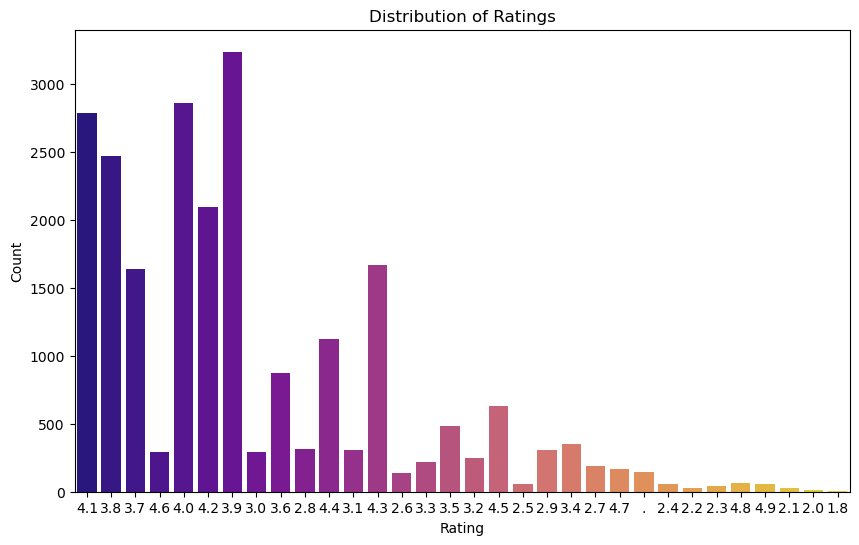

In [5]:
# This graph analyses Distribution of Ratings

import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rate', data=zomato_df, palette='plasma')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### 1.2 This graph checks for Number of Restaurants in Each Location

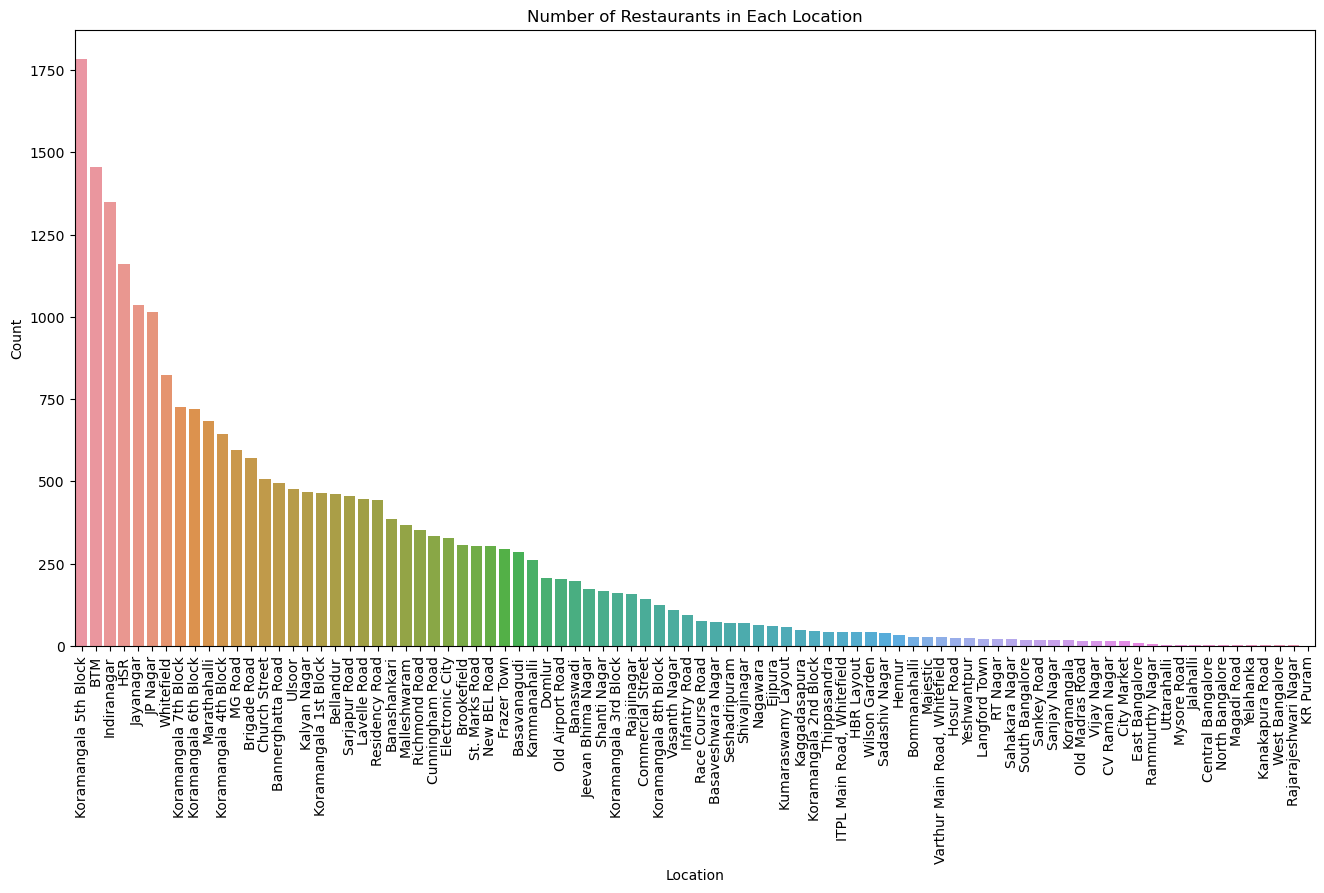

In [6]:
# Location-wise analysis
plt.figure(figsize=(16, 8))
sns.countplot(x='location', data=zomato_df, order=zomato_df['location'].value_counts().index)
plt.title('Number of Restaurants in Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

####  1.3 This graph shows the cost of Restaurant vs Rating

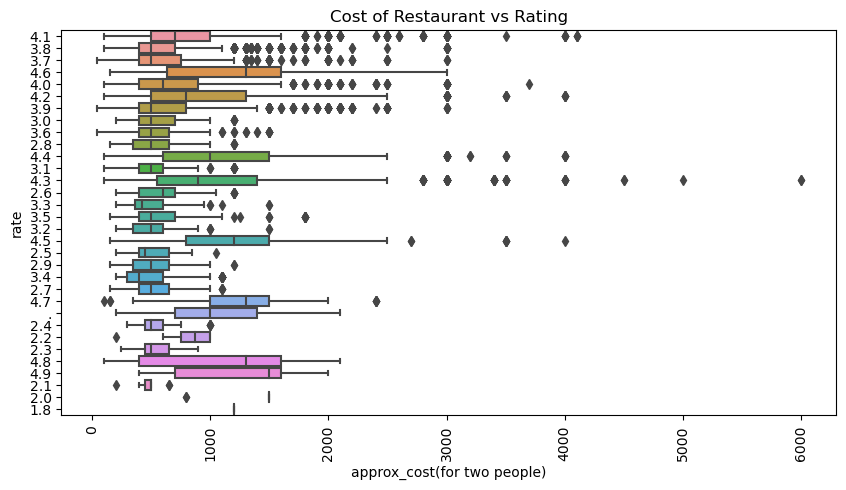

In [7]:
# Data Cleaning
# convert the 'approx_cost(for two people)' column to a numeric format. 
#'rate' column might also be stored as a string due to the presence of symbols like '/5'.
# Convert 'rate' to numeric format (remove '/5' symbol)
zomato_df['rate'] = zomato_df['rate'].replace('NEW', 0)

zomato_df['approx_cost(for two people)'] = zomato_df['approx_cost(for two people)'].str.replace(',', '')
zomato_df['approx_cost(for two people)'] = zomato_df['approx_cost(for two people)'].str.replace('₹', '').astype(float)

# Cost of Restaurant vs Rating
plt.figure(figsize=(10, 5))
sns.boxplot(x='approx_cost(for two people)', y='rate', data=zomato_df)
plt.title('Cost of Restaurant vs Rating')
plt.xticks(rotation=90)
plt.show()

#### 1.4 This graph analyses the restaurants delivering Online or not

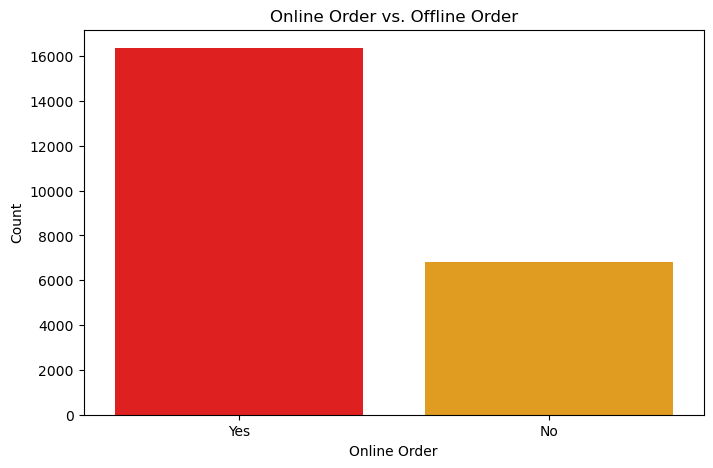

In [8]:
# This graph analyses Online order vs. Offline order
plt.figure(figsize=(8, 5))
sns.countplot(x='online_order', data=zomato_df, palette={'Yes': 'red', 'No': 'orange'})
plt.title('Online Order vs. Offline Order')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()

#### 1.5 This graph displays the Top cuisines


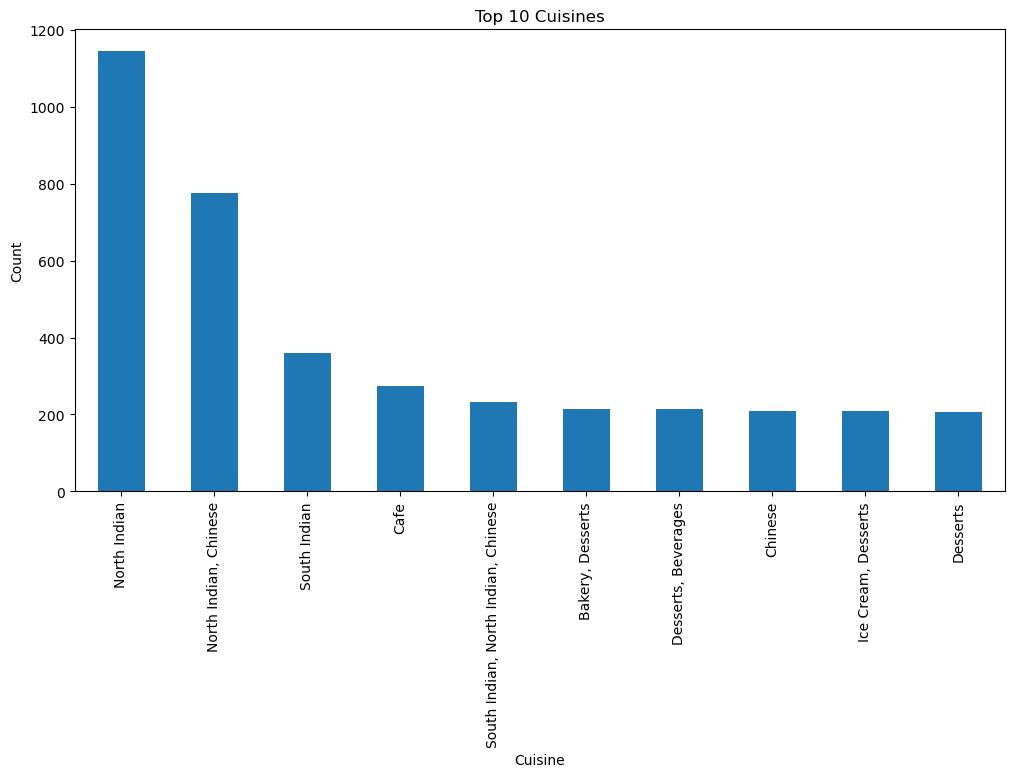

In [9]:
# Top cuisines
top_cuisines = zomato_df['cuisines'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_cuisines.plot(kind='bar')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

 ### 2. The table provided below gives a glimpse of the cleaned dataset 2 "Zomato Bangalore Restaurants 2022"

In [10]:
os.chdir('..')
Sqlfilepath1 = os.path.join(os.getcwd(), "made-template-WS2324", "data", "Banglore.sqlite")
print(Sqlfilepath1)
conn = sqlite3.connect(Sqlfilepath1)

# Test case: Selecting the query using PANDAS function to check whether the data is stored in the database.
query = f"SELECT * FROM Banglore;"
banglore_df = pd.read_sql_query(query, conn)
# print(banglore_df)

/Users/akshatkhara/Desktop/Study Material/Semester 3/Methods of Advance Data Engineering/made-template-WS2324/data/Banglore.sqlite


In [11]:
banglore_df.head(5)

,name,Cuisines,Area,online_order,isTakeaway,isIndoorSeating,isVegOnly,rate,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,approx_cost(for two people)
0,Meghana Foods,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Yes,Yes,1,No,4.3,1654,4.3,28600,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, ...",700
1,Burger King,"Burger, Fast Food, Beverages, Desserts","Indiranagar, Bangalore",Yes,Yes,1,No,4.1,1499,4.1,22400,"High-quality, great-tasting and affordable Bur...","Crispy Spicy Chicken, Chilly Burger, Thick Man...",400
2,McDonald's,"Burger, Beverages, Fast Food, Desserts","Indiranagar, Bangalore",Yes,Yes,1,No,3.8,500,4.1,7508,Their reasonably priced combos,"Mcspicy Chicken, Mcspicy Paneer, Maharaja Mac,...",400
3,Mani's Dum Biryani,"Biryani, Kebab","Jeevan Bhima Nagar, Bangalore",Yes,Yes,1,No,4.2,708,4.1,12700,It's flavourful Mutton Biryani.,"Paneer Fry, Chicken 65, Egg Biryani, Mutton Bi...",800
4,Nagarjuna,"Andhra, Biryani, North Indian","Indiranagar, Bangalore",Yes,Yes,1,No,4.3,2323,4.1,455,Andhra meals and Biryanis,"Vada Curry, Sweet Lime, Dal Palak, Mutton Masa...",800


#### 2.1 This graph analyses Distribution of Ratings

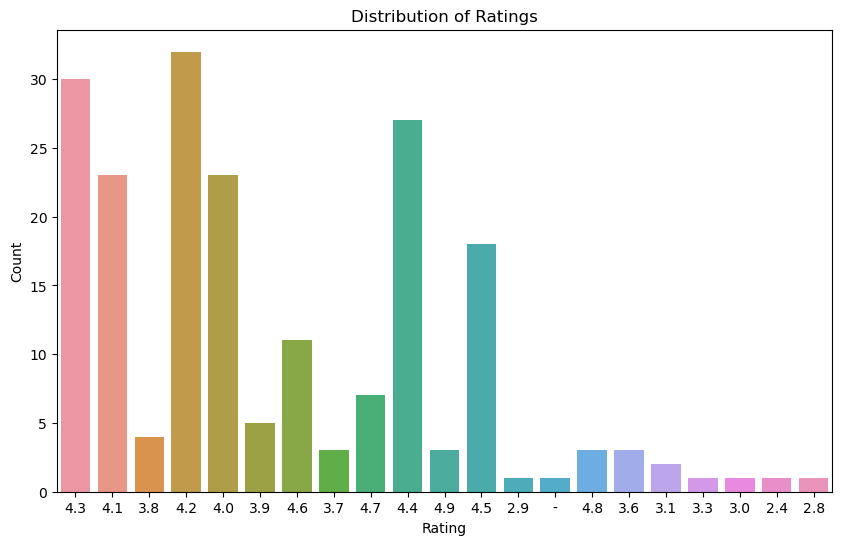

In [12]:
# This graph analyses Distribution of Ratings
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rate', data=banglore_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Indiranagar, Bangalore'),
  Text(1, 0, 'Jayanagar, Bangalore'),
  Text(2, 0, 'Koramangala 5th Block, Bangalore'),
  Text(3, 0, 'Whitefield, Bangalore'),
  Text(4, 0, 'Marathahalli, Bangalore'),
  Text(5, 0, 'Church Street, Bangalore'),
  Text(6, 0, 'JP Nagar, Bangalore'),
  Text(7, 0, 'Kalyan Nagar, Bangalore'),
  Text(8, 0, 'Malleshwaram, Bangalore'),
  Text(9, 0, 'Banashankari, Bangalore')])

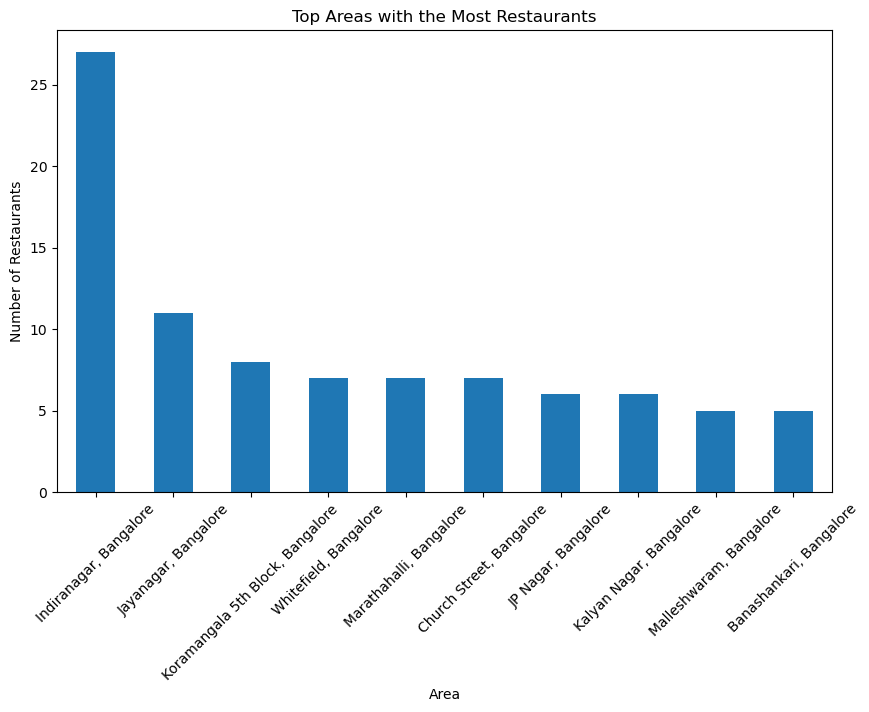

In [13]:
#missing value cleanup not required as important columns have no-null data

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
area_counts = banglore_df['Area'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
area_counts.plot(kind='bar')
plt.title('Top Areas with the Most Restaurants')
plt.xlabel('Area')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

#### 2.2 Display the top-rated restaurants sorted by dinner reviews

In [14]:
# Filter the DataFrame for restaurants in "Electronic City, Bangalore"
electronic_city_restaurants = banglore_df[banglore_df['Area'] == 'Electronic City, Bangalore']

# Convert 'Dinner Ratings' and 'Dinner Reviews' to numeric data types using .loc
electronic_city_restaurants.loc[:, 'rate'] = pd.to_numeric(
    electronic_city_restaurants['rate'], errors='coerce')
electronic_city_restaurants.loc[:, 'Dinner Reviews'] = pd.to_numeric(
    electronic_city_restaurants['Dinner Reviews'], errors='coerce')

# Sort the filtered DataFrame by 'Dinner Ratings' in descending order
top_rated_electronic_city_restaurants = electronic_city_restaurants.sort_values(
    by='rate', ascending=False)

# Then, sort by 'Dinner Reviews' in descending order
top_rated_electronic_city_restaurants = top_rated_electronic_city_restaurants.sort_values(
    by='rate', ascending=False)

# Display the top-rated restaurants sorted by dinner reviews
print(top_rated_electronic_city_restaurants[['name', 'rate', 'Dinner Reviews']].head(10))

                             name  rate  Dinner Reviews
178               Barbeque Nation   4.5            4757
179  Time Traveller - Sai Vishram   4.4             996


/var/folders/kt/fp5_2bc96kzgc81v4z1cx8500000gn/T/ipykernel_63589/921076598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electronic_city_restaurants.loc[:, 'rate'] = pd.to_numeric(
/var/folders/kt/fp5_2bc96kzgc81v4z1cx8500000gn/T/ipykernel_63589/921076598.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electronic_city_restaurants.loc[:, 'Dinner Reviews'] = pd.to_numeric(


#### 2.3 Display the top cuisines

In [15]:
# Assuming your DataFrame is named 'df'

# Filter the DataFrame to include only restaurants in "Electronic City, Bangalore"
electronic_city_restaurants = banglore_df[banglore_df['Area'] == 'Electronic City, Bangalore']

# Split and flatten the cuisines into a list
cuisine_lists = electronic_city_restaurants['Cuisines'].str.split(', ').explode()

# Get the value counts of each cuisine
top_cuisines = cuisine_lists.value_counts()

# Display the top cuisines
print(top_cuisines.head(15))

North Indian    2
BBQ             1
Mughlai         1
Biryani         1
Desserts        1
Beverages       1
Continental     1
South Indian    1
Chinese         1
Name: Cuisines, dtype: int64


# Conclusions:

In conclusion, this analysis provides meaningful information about Zomato restaurants in Banglore. Future work could involve covering additional datasets for a more comprehensive understanding and exploring trends in user preferences. Restaurant owners hoping to accommodate changing tastes and preferences as well as customers looking for a variety of dining experiences can both benefit from an understanding of these changes.